# Hypothesis Testing :-

* ChiSquare test :-
    * THe chi-Square test of independence is a statical test to determine if there is a significant ralationship between 2 categorical variables.
    * see notes link  pages no from 41 -https://drive.google.com/file/d/1UUiDx_v3E7Jg6uP9EZXWDkXrUGaTH-jj/view
* Student T-test :-
* Paired T-test :-
* Pearson Correlation test :-
* Spearman correlation :-
    
    * T-test is used when my data is to less or less the fifty or T<50.

* Rule of use the chi-square Test :-
    * 1> Variable are Categorical
    * 2> Frequency is at least 5
    * 3> Variable are simple and independently.
    * -> Chi-Square Test in Python
    * -> We will be implementing this test in an easy to use python class we will call ChiSquare. Our class initialization requires a pandas's data frame which will caontain the dataset to be used for testing. The Chi-Square test provides important Variables such as  the p-value mentioned previously, the Chi-Square statistic and the degree of freedom.
    * -> from scipy.states import chi2_contingency
    * -> from scipy.stats import ChiSquare

Categorical Variable test of independence ----> chi Square test

Checking the chi square test 

In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
ds=pd.read_csv("role_website.csv")

In [2]:
df=pd.DataFrame(ds)
ds

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin
5,student,facebook
6,student,facebook
7,teacher,linkedin
8,teacher,linkedin
9,teacher,facebook


In [3]:
df.describe() 

# this function give the total discription of the data.
# unique---> unique means here teather/student and linkedin/facebook
# freq ---> 21 time teacher come and 18 time linkedin come intire 34 rows.

,role,website
count,34,34
unique,2,2
top,teacher,linkedin
freq,21,18


In [4]:
df.info() #this function gives  all the details information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     34 non-null     object
 1   website  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [5]:
df.dtypes # this function gives data types or of each columns

role       object
website    object
dtype: object

In [6]:
#Create contingency table

df_crosstab =pd.crosstab(df['role'],df['website'],margins = True ) # margin=True.. means  All .
print(df_crosstab)
# inside the pandas have .crosstab function which will take the rows and column that which columns to make as rows and which columns to make  exact column into the cross table to see cross detail of data i.e. how many time total has been happen ex-student with facebook 10time,teacher with linkedin 15time etc.

website  facebook  linkedin  All
role                            
student        10         3   13
teacher         6        15   21
All            16        18   34


In [7]:
df_crosstab.columns=["facebook","linkedin","row_totals"] 
df_crosstab.index=["student","teacher","col_totals"]
df_crosstab

#Here without margin= True we can put maunally columns name (row_detail) to see cross details of data.

,facebook,linkedin,row_totals
student,10,3,13
teacher,6,15,21
col_totals,16,18,34


In [8]:
# Get the observed table 

observed = df_crosstab.iloc[0:2,0:2] #by index location (iloc) function we can see data by give specific rows and column data.
observed

,facebook,linkedin
student,10,3
teacher,6,15


In [9]:
# Expected table 
# E = (row total * column total)/grand total #(manually formula for expected value)
# E1 =13*16/34

expected=np.outer(df_crosstab["row_totals"][0:2],df_crosstab.loc["col_totals"][0:2])/34 #(funcction  to get expected value)
expected

array([[ 6.11764706,  6.88235294],
       [ 9.88235294, 11.11764706]])

In [10]:
#So now we have observed table and expected table then go to next step that is to calculate chi squre value see below

* STEP 3 : CALCULATE THE CHISQUARE VALUE AND CRITICAL VALUE


"""
* Chi square formula :
    *  chi square = total of [(observed -expected)^2]/expected


* Note: 
        We call .sum() twice:once to get the column sums
        and a second time to add the column sums together,
        returning the sum of the entire 2D table .
"""

In [11]:
chi_squared_stat=(((observed -expected)**2)/expected).sum().sum()

""""*Note:  We call .sum() twice time bcz :once to get the column sums and a second time to add the column sums together,
returning the sum of the entire 2D table ."""

print(chi_squared_stat)

7.5347985347985365


In [12]:
# After getting chi square value then go for degree of frame see below

In [13]:
"""
    FIND the Critical value for confidence of 95% and the degree of frame (df) of 1.
    Why df = 1?
    Degree of frame formula:
        df = (total rows - 1) x (total columns - 1)
           = (2-1) x (2-1)
           = 1 x 1
           = 1
"""

'\n    FIND the Critical value for confidence of 95% and the degree of frame (df) of 1.\n    Why df = 1?\n    Degree of frame formula:\n        df = (total rows - 1) x (total columns - 1)\n           = (2-1) x (2-1)\n           = 1 x 1\n           = 1\n'

In [14]:
# After getting degree of freedom we will go for percent point function.

* PPF(percent point function)- It is use to find out the critical value.

In [15]:
# PPF---> Percent point function
#These distribution functions values are required in inferential statistics, when constructing confidence intervals for the 
# implementation of hypothesis tests , especially for the calculation of the p-value.

#st.chi2.ppf? 

In [16]:
import scipy.stats as st
crit=st.chi2.ppf(q=.95,df=1) #inside the scipywe having the chi2 and chi2 stands for the chi-square test
print(crit)
# it will give the critical value and here  .95 is confidence leve and degree of freedom(df)=1 hai.
#Inside it statisian create prier tabele so we can see if cofidence level is .95 and df=1 then it will give critical value similarly for other value 

3.841458820694124


In [25]:
"""Now we can five the final conclusion that role and website are dependent as null hypothesis is rejected.
because chi-square > critical value (7.53>3.84)"""

#here critical value =3.84 and chi-square value = 7.54 above calculated earlier.
#if the chi value is greater than critical value then null hypothesis is rejected and alternative hypthesis is accepted.
#accepted means here two row and colulmn are dependent on each others

'Now we can five the final conclusion that role and website are dependent as null hypothesis is rejected.\nbecause chi-square > critical value (7.53>3.84)'

In [18]:
# st.chi2_contingency ?

In [26]:
"""Methodology 2 : Calculate chi-square using scipy.stat library"""

chi2,p,dof,expected=stats.chi2_contingency(observed=observed) 
# here contingency mean expected table and here using observe table 
# by this function, chi2_contingency will internally take the observe table and then it will give four expect value that is ch2,p-value,dof(degree of freedom),expected value   

#You can check the returned data by calling it
#The returned data includes : chi_squared_stat,p_value,df, expected_crosstab
#Print("sttesult="stresult)

print("chi square test=",chi2)
print("p-value=",p)
print("dof=",dof)
print("expected=",expected)

"""From this we interpret the p-value is .16 that is less than .05--> signifcant value.
Hence null hypothesis is rejected and show variables are dependent of each other.
"""

chi square test= 5.718991656491658
p-value= 0.01678236577734386
dof= 1
expected= [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


'From this we interpret the p-value is .16 that is less than .05--> signifcant value.\nHence null hypothesis is rejected and show variables are dependent of each other.\n'

In [29]:
#Significance value
#singnificance value or alpha value =0.05 ,both are same
alpha = 0.05
#Determine wheather to reject or keep your null hypothesis 
print('significance level alPha=%.2f, p=%.2f' % (alpha,p))
if p >= alpha :
    print('Variables are not associated and independent ( accept h0 -Null hypothesis)')
else:
    print('Variables are associated or dependent (reject h0 and H1)')

significance level alPha=0.05, p=0.02
Variables are associated or dependent (reject h0 and H1)


### Measure of Ralationship :-

Notes link from page no 49- https://drive.google.com/file/d/1UUiDx_v3E7Jg6uP9EZXWDkXrUGaTH-jj/view

* __Covariance :-__ 
    * Covariance is a measure of the relationship between the variability of 2 variables i.e. it measure the degree of change in the variables , when one variable changes , will be the same/a similar other value.

### Corelation Coefficient r :-
* Corelation quantifies relationship.Corelation range -1 and +1 with 0 meaning there is no relationship at all.

* Measures strength of a relationship between two continuous variables.
* Corelation also represent with the "r".
*  range of corelation lies between -1 to 1.
* if r = 0.9 , then my data is Strong Positive linear relationship.
* if r = 0.01, then my data is No Linear relationship.
* if r = -0.9 then my data is Strong Negative linear relationship

### Corelation :-
* __Corelation :__ Corelation gives a better understanding of covarience. It is normalized covariance. Corelation tells us how correlated the variables are to each other. It is also called as __Pearson Correlation Coefficient__.
* See formula And example  in notes or from page no 52.
* Heat map is the best way to findout the corelation with the color value.


### ANOVA (F-TEST) :- 
* ANOVA test is the analysis of variances between the data.
     * that is like MANOVA,ANCOVA ETC TEST HERE.
        
* The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

* Read doc for more information  or notes reposatory -->F_test> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

# Cheaking  of outlier (z-score) - :-
* Finding outliers :-

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('president_heights.csv')
df

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [13]:
df.columns

Index(['order', 'name', 'height'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8afc9d2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8afc9d9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8afc84f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8afca90a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8afca93a0>],
 'means': []}

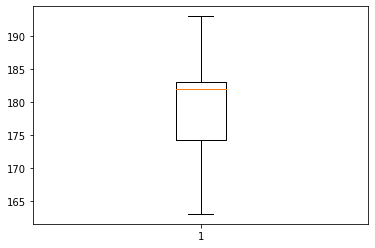

In [14]:
plt.boxplot(df.height)
#here outlier is not prsent bcz outlier present in above maximum line and below the minimum line .

In [15]:
# Inside the df pandas quantile method so here we cheak each percentile to cheak outliers.
# No outliers

df['height'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    163.0
0.1    170.1
0.2    173.0
0.3    175.6
0.4    178.0
0.5    182.0
0.6    183.0
0.7    183.0
0.8    185.0
0.9    188.0
1.0    193.0
Name: height, dtype: float64

In [19]:
df1=pd.read_csv('HR_attrition_rate.csv')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
df1.columns # to see all columns 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8afdfd340>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8afdfda00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8afdf1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8afe09100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8afe09400>],
 'means': []}

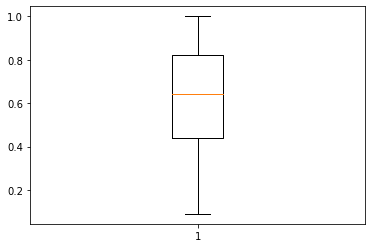

In [25]:
plt.boxplot(df1.satisfaction_level)
#there  ore no outliers

In [27]:
df1['satisfaction_level'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.09
0.1    0.21
0.2    0.40
0.3    0.49
0.4    0.57
0.5    0.64
0.6    0.72
0.7    0.78
0.8    0.85
0.9    0.92
1.0    1.00
Name: satisfaction_level, dtype: float64

In [31]:
df3=pd.read_csv('brain_size.csv',sep=';')
df3.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [33]:
df3.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8aff73c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8aff7e340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8aff738e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8aff7ea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8aff7ed00>],
 'means': []}

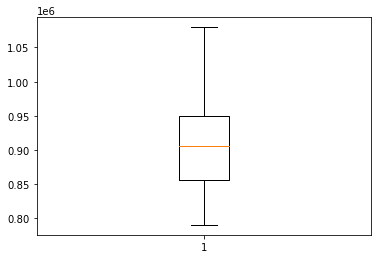

In [34]:
plt.boxplot(df3.MRI_Count)

In [36]:
tf=pd.read_csv('titanic_train.csv')
tf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
tf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8b10bb3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8b10bba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8b10bb040>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8b10c5160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8b10c5460>],
 'means': []}

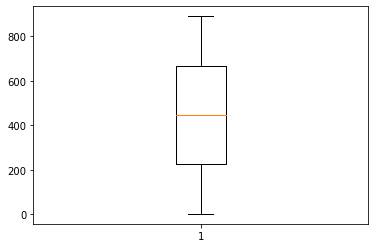

In [42]:
plt.boxplot(tf.PassengerId)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8afd147f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8afcbeb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8afd14d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8af5c0700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8ac685580>],
 'means': []}

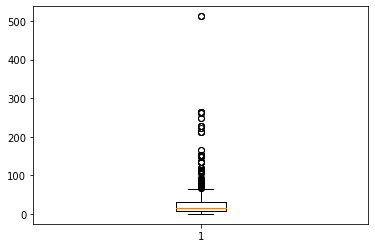

In [43]:
plt.boxplot(tf.Fare)

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8b11d3640>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8b11d3d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8b11d3430>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8b11df400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8b11df700>],
 'means': []}

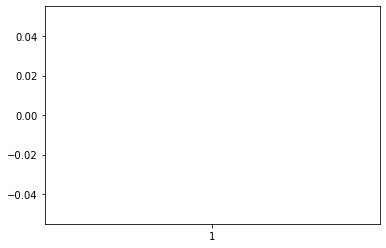

In [46]:
plt.boxplot(tf.Age)

In [74]:
hf=pd.read_csv('house_price_data_median.csv')
hf.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [75]:
hf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8b13ef730>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8b13e2490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8b1201160>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8b13c5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8b13c56a0>],
 'means': []}

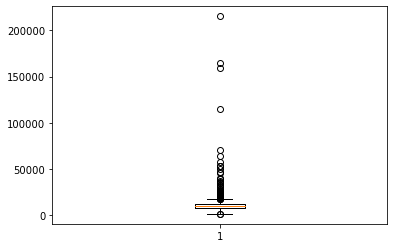

In [76]:
plt.boxplot(hf.LotArea)
#here outliers are present

In [77]:
hf['LotArea'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      1300.0
0.1      5000.0
0.2      7078.4
0.3      8063.7
0.4      8793.4
0.5      9478.5
0.6     10198.2
0.7     11066.5
0.8     12205.8
0.9     14381.7
1.0    215245.0
Name: LotArea, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8b3812370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8b3812580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8b3812f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8b273d880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8b273d340>],
 'means': []}

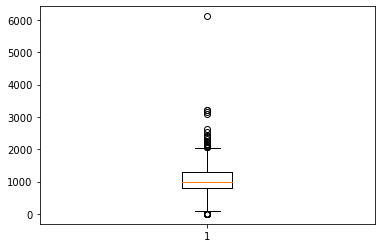

In [78]:
plt.boxplot(hf.TotalBsmtSF)
#here outliers are present

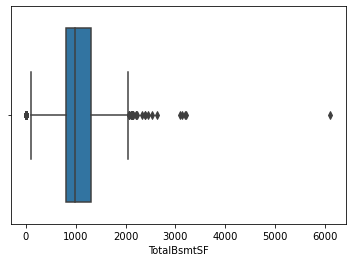

In [79]:
import seaborn as sns
sns.boxplot(hf.TotalBsmtSF)

In [80]:
hf['TotalBsmtSF'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       0.0
0.1     636.9
0.2     755.8
0.3     840.0
0.4     910.0
0.5     991.5
0.6    1088.0
0.7    1216.0
0.8    1391.2
0.9    1602.2
1.0    6110.0
Name: TotalBsmtSF, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8b3858700>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8b3858dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8b38583a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8b38634c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8b38637c0>],
 'means': []}

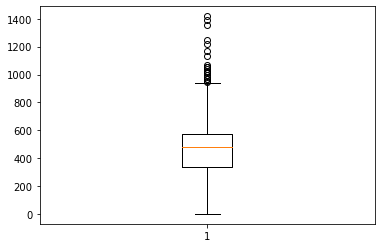

In [81]:
plt.boxplot(hf.GarageArea)

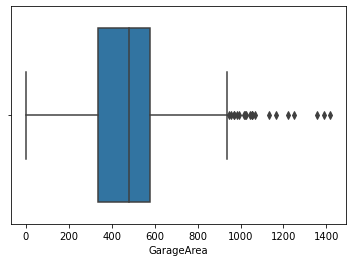

In [82]:
sns.boxplot(hf.GarageArea)


In [83]:
hf['GarageArea'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       0.0
0.1     240.0
0.2     295.6
0.3     384.0
0.4     440.0
0.5     480.0
0.6     516.0
0.7     560.0
0.8     620.2
0.9     757.1
1.0    1418.0
Name: GarageArea, dtype: float64

In [84]:
hf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

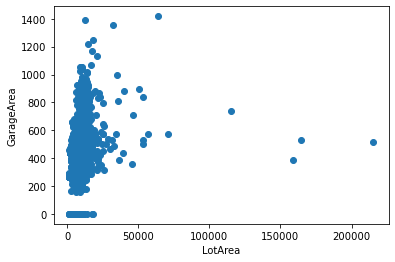

In [85]:
plt.scatter(hf.LotArea,hf.GarageArea)
plt.xlabel('LotArea')
plt.ylabel('GarageArea')
plt.show()
#some outliers present here

In [86]:
hf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

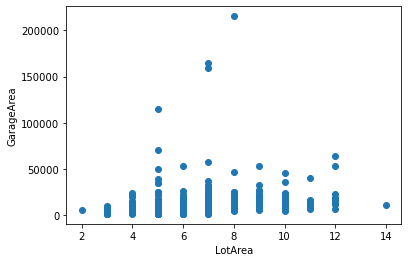

In [88]:
plt.scatter(hf.TotRmsAbvGrd,hf.LotArea)
plt.xlabel('LotArea')
plt.ylabel('GarageArea')
plt.show()
#some outliers present here but outliers means not intentional error

# Discover Outliers with mathematical function :-
(how to remove out liers)

Z-score-

Wikipedia Definition The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.


* The Definition behind z-score is to describeany data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

* z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

* You must be wondering that, how does this help in identify the outliers?
    * Well, While calculating the z-score we re-scale and centre thr data and look for data points which are too far from zero.
* These data points which are way too far from zero will be treated as the outliers.
* In most of the cases threshold of 3 to -3 is used i.e. if the z-score value is greater than or lessthan 3 or -3 respectively, that datapoint will be identifid as outliers.

In [90]:
from scipy.stats import zscore
import numpy as np

In [93]:
z=np.abs(zscore(hf)) #here hf is data frame ('house_price_data_median.csv')
z

array([[0.20714171, 0.65147924, 0.51719981, ..., 0.95122649, 0.35100032,
        1.00274349],
       [0.09188637, 0.07183611, 2.17962776, ..., 0.60049493, 0.06073101,
        1.00274349],
       [0.07347998, 0.65147924, 0.51719981, ..., 0.60049493, 0.63172623,
        1.00274349],
       ...,
       [0.14781027, 0.65147924, 3.07857028, ..., 2.15221636, 1.03391416,
        1.00274349],
       [0.08016039, 0.79515147, 0.38174271, ..., 0.95122649, 1.09005935,
        0.99726402],
       [0.05811155, 0.79515147, 0.38174271, ..., 0.95122649, 0.9216238 ,
        0.99726402]])

Looking the code and the output above, it is dificult to say which data point is an outlier Ler's try and define a threshold to identify an outlliers.

In [95]:
thereshold =3
print(np.where(z>3)) 

#here by this method we can see data where z>3 bcz they are all outliers.
#here we get rows and columns  location where outlier is present.
#ex-53th row and 0th column ,53th row 6th column similarly for all, where these position outlier is present.
#see some example below this cell how to call to se outliers

(array([  53,   53,   88,  144,  166,  178,  185,  185,  188,  189,  191,
        218,  224,  241,  249,  250,  291,  298,  304,  309,  313,  330,
        332,  335,  375,  375,  378,  384,  398,  440,  451,  457,  461,
        496,  508,  519,  523,  533,  570,  581,  583,  597,  605,  624,
        628,  634,  635,  635,  642,  661,  664,  676,  691,  703,  706,
        726,  745,  769,  769,  803,  825,  843,  848,  897,  897,  910,
        921,  980,  991, 1031, 1044, 1061, 1123, 1149, 1154, 1163, 1163,
       1173, 1182, 1190, 1213, 1213, 1230, 1230, 1268, 1270, 1283, 1298,
       1298, 1298, 1298, 1298, 1327, 1350, 1350, 1350, 1352, 1373, 1386,
       1396, 1435, 1450, 1457], dtype=int64), array([0, 6, 2, 6, 8, 9, 2, 7, 5, 6, 2, 2, 3, 2, 0, 2, 6, 5, 2, 8, 0, 6,
       3, 0, 1, 2, 2, 0, 2, 3, 0, 0, 2, 3, 2, 2, 3, 1, 6, 9, 2, 5, 8, 5,
       5, 6, 6, 7, 8, 0, 9, 2, 3, 2, 0, 2, 2, 0, 7, 7, 9, 6, 0, 6, 7, 7,
       5, 2, 2, 7, 3, 9, 2, 2, 5, 5, 6, 7, 3, 9, 2, 6, 5, 7, 2, 6, 5, 0,
    

In [96]:
#array 1 is holding the row number and array 2is holding the column
#all the values are greater than 3
#z[Row][column]

z[53][0]

3.98424384357879

In [97]:
z[1457][2]

3.0785702794481655

In [98]:
z[144][2]

0.5171998069472914

In [99]:
z[144][6]

3.842510049724758

### Process of removing Outliers:-

IQR score- Box plot use the IQR method to display data and outlier (Shape of the data) but in order to be get alist of identified outlier, we will need to use the mathematical formula and retrieve data.

The interquartile range(IQR), also called the midspred or middle 50%, or technically H-spread, is a measure of statistical dispersion , being equal to the difference between 75th and 25th percentiles,or between upper and lower quartiles, IQR = Q3 - Q1.

According to the basic defination of IQR outliers, Values less than Q1-1.5IQR and values greater that Q3+1.5IQR are terated as outlier.So,

In [101]:
#Q1 means 25th percentile and Q3 means 75th percentile.


Q1=hf.quantile(.25)

In [102]:
Q3=hf.quantile(.75)

In [103]:
Q1

LotArea             7553.50
OverallQual            5.00
OverallCond            5.00
TotalBsmtSF          795.75
FullBath               1.00
HalfBath               0.00
BedroomAbvGr           2.00
TotRmsAbvGrd           5.00
Fireplaces             0.00
GarageArea           334.50
AboveMedianPrice       0.00
Name: 0.25, dtype: float64

In [104]:
Q3

LotArea             11601.50
OverallQual             7.00
OverallCond             6.00
TotalBsmtSF          1298.25
FullBath                2.00
HalfBath                1.00
BedroomAbvGr            3.00
TotRmsAbvGrd            7.00
Fireplaces              1.00
GarageArea            576.00
AboveMedianPrice        1.00
Name: 0.75, dtype: float64

In [105]:
IQR= Q3-Q1

In [106]:
IQR

LotArea             4048.0
OverallQual            2.0
OverallCond            1.0
TotalBsmtSF          502.5
FullBath               1.0
HalfBath               1.0
BedroomAbvGr           1.0
TotRmsAbvGrd           2.0
Fireplaces             1.0
GarageArea           241.5
AboveMedianPrice       1.0
dtype: float64

In [108]:
print((hf <(Q1-(1.5*IQR) ))| (hf >(Q3 + (1.5 * IQR))))

#somewhere true is here in output  that means showing above of max or min value(in box plot outliers) the outliers is present. our

      LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0       False        False        False        False     False     False   
1       False        False         True        False     False     False   
2       False        False        False        False     False     False   
3       False        False        False        False     False     False   
4       False        False        False        False     False     False   
...       ...          ...          ...          ...       ...       ...   
1455    False        False        False        False     False     False   
1456    False        False        False        False     False     False   
1457    False        False         True        False     False     False   
1458    False        False        False        False     False     False   
1459    False        False        False        False     False     False   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0         

REMOVING OUTLIERS :-

Working with Outliers: Correcting, Removing During data analysis when you detect the out of most dificukt decision could be how one dhould deal with the outlier.Should they remove them or correct them ? Before we talk  about this , we have look at few method of removing the outliers.

Z-Score

in the previoud section, we saw how one can detect the outlier using z-score but now we want to remove or filter the outliers and get the clean data.This can be done with just one line code as we have already calculated the Z-Score.

In [109]:
hf_new = hf [(z<3).all(axis=1)]

#all the z-score value which is less than 3 (z<3)and .all operation means all the row along with column
#all the z-score value which is less than 3 (z<3) inside the dataframe that is removed mean less than where three z score value that  outliers are remove from the dataframe.

In [113]:
hf.shape #Old dataframe shape with outlier

#here 1460 rows 11 columns present in older dataframe

(1460, 11)

In [114]:
hf_new.shape #new dataframe without outlier

# now here 1360 rows 11 columns present in new dataframe

(1372, 11)

*** ---> here z<3 outlier is removed, z-score(z) value  less than and  greater than 3 both above(3) and below(-3) outlier is present but here z<3 outliers we remomed in this dataframe.

So,above code removed around 100+ rows from the dataset i.e. Outlier haveen removed.

The end Session

time 10 min pe kuch notes banana h correlation ko samjhne lie ase machine ka part tha baki dekh lio agr machine me nhi hua to yaha par notes bna lio.